In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

In [5]:
import numpy as np

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
# Load the dataset

In [8]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [9]:
df = pd.read_csv(url)

In [11]:
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
205,2014,CHEVROLET,EQUINOX,SUV - SMALL,3.6,6,A6,X,13.9,9.6,12.0,24,276
672,2014,LEXUS,LS 600h L,MID-SIZE,5.0,8,AV8,Z,12.0,10.7,11.4,25,262
218,2014,CHEVROLET,EXPRESS 1500 CARGO CONV AWD,VAN - CARGO,5.3,8,A4,E,25.3,19.3,22.6,12,362
185,2014,CADILLAC,XTS,FULL-SIZE,3.6,6,AS6,X,13.6,8.6,11.4,25,262
53,2014,AUDI,RS5 CABRIOLET,SUBCOMPACT,4.2,8,A7,Z,15.2,11.3,13.4,21,308


In [12]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [18]:
df = df.drop(['MODELYEAR','MAKE','MODEL','VEHICLECLASS','TRANSMISSION','FUELTYPE'], axis=1)

In [19]:
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [21]:
df = df.drop(['CYLINDERS','FUELCONSUMPTION_CITY',	'FUELCONSUMPTION_HWY',	'FUELCONSUMPTION_COMB'], axis=1)

In [22]:
df.head(9)

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244
5,3.5,28,230
6,3.5,28,232
7,3.7,25,255
8,3.7,24,267


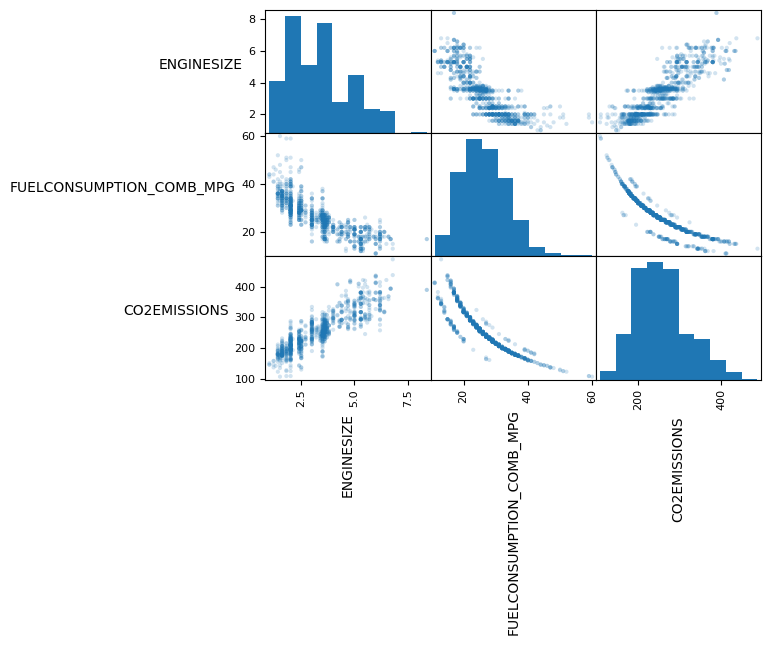

In [24]:
axes = pd.plotting.scatter_matrix(df, alpha=0.2)

# need to rotate axis labels so we can read them

for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')


In [25]:
plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0,hspace=0)
plt.show()

<Figure size 640x480 with 0 Axes>